In [65]:
from numba import jit
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pynamical
from pynamical import simulate, cubic_map, singer_map, bifurcation_plot, phase_diagram, phase_diagram_3d
%matplotlib inline

## Insect outbreak

In [46]:
@jit(cache=True, nopython=True)  # pragma: no cover
def insect_map(pop, rate, p=2, K=8.):
    #p-exponent, K-carrying capacity
    N=rate * pop * (1 - pop/K) - (pop**p / (1 + pop**p))
    return N

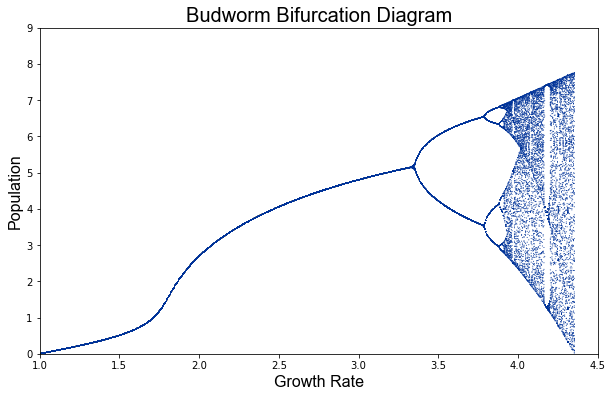

In [48]:
pops = simulate(model=insect_map, num_gens=100, rate_min=1, rate_max=6, num_rates=1000, num_discard=100)
bifurcation_plot(pops, title='Budworm Bifurcation Diagram', xmin=1, xmax=4.5, ymax=9, save=False)

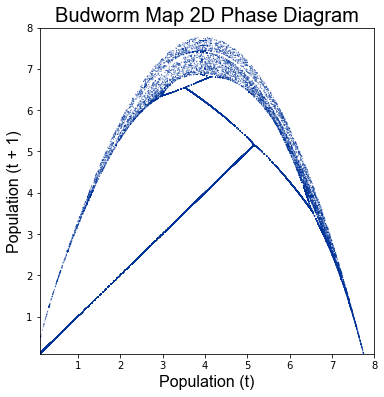

In [51]:
phase_diagram(pops, xmin=0.1, xmax=8, ymin=0.1, ymax=8, save=False, title='Budworm Map 2D Phase Diagram')

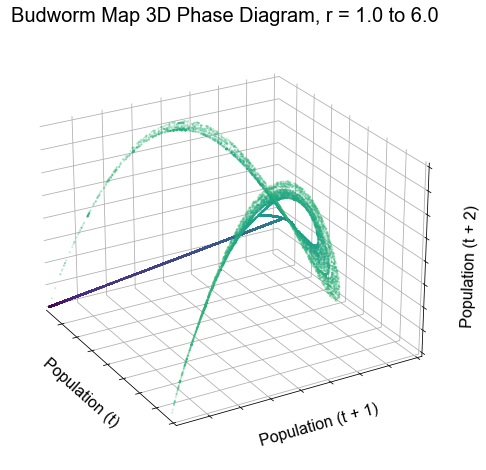

In [56]:
phase_diagram_3d(pops,  xmin=0.1, xmax=8, ymin=0.1, ymax=8,zmax=8, save=False, alpha=0.2, color='viridis',
                 azim=330, title='Budworm Map 3D Phase Diagram, r = 1.0 to 6.0')

## Phase diagram

In [76]:
pops2 = simulate(model=insect_map, num_gens=20, rate_min=1, rate_max=10, num_rates=10)

In [77]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

Text(0, 0.5, 'Population')

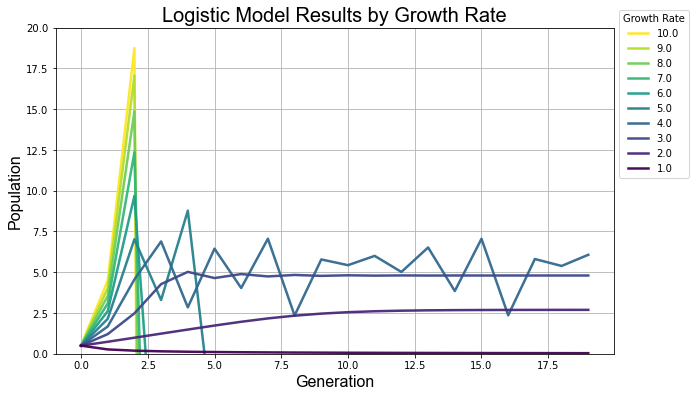

In [80]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()
# plot the results of the logistic map run for these 7 different growth rates
#color_list = ['#cc00cc', '#4B0082', '#0066cc', '#33cc00', '#cccc33', '#ff9900', '#ff0000']
color_list = get_colors('viridis', n=len(pops2.columns), start=0., stop=1)
for color, rate in reversed(list(zip(color_list, pops2.columns))):
    ax = pops2[rate].plot(kind='line', figsize=[10, 6], linewidth=2.5, alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 20])
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)